# Task Summary
Follwing is the EDA for Social Network Ads. 
https://www.kaggle.com/rakeshrau/social-network-ads


I have tried to find correlations within the training dataset.
We have done some statistical analysis as well as augmented them with plots and visualized them.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df #Initial structure of the data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
new = df["Gender"].str.split("-", n = 1, expand = True) #Preparing data for analysis

In [5]:
df["Male"]= new[0]

In [6]:
df["Female"]= new[0]

In [7]:
df.drop(columns =["Gender"], inplace = True)    

In [8]:
# describing stats of variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [9]:
df.shape  #400 rows x 6 columns

(400, 6)

In [10]:
df.columns # column names 

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Male', 'Female'], dtype='object')

In [11]:
df.info

<bound method DataFrame.info of       User ID  Age  EstimatedSalary  Purchased    Male  Female
0    15624510   19            19000          0    Male    Male
1    15810944   35            20000          0    Male    Male
2    15668575   26            43000          0  Female  Female
3    15603246   27            57000          0  Female  Female
4    15804002   19            76000          0    Male    Male
..        ...  ...              ...        ...     ...     ...
395  15691863   46            41000          1  Female  Female
396  15706071   51            23000          1    Male    Male
397  15654296   50            20000          1  Female  Female
398  15755018   36            33000          0    Male    Male
399  15594041   49            36000          1  Female  Female

[400 rows x 6 columns]>

In [12]:
df.dtypes
team = df['Age']

In [13]:
df[['Male']] = df[['Male']].apply(pd.to_numeric, errors='coerce')

In [14]:
cor = df.corr()

In [15]:
#Correlation with respect to Gender variable and filtering out variables with less correlation.
columns = cor[cor["Male"]>0.75]['Male']
columns_list = columns.index
columns_list

Index([], dtype='object')

In [16]:
df1 = pd.DataFrame(df, columns=columns_list)

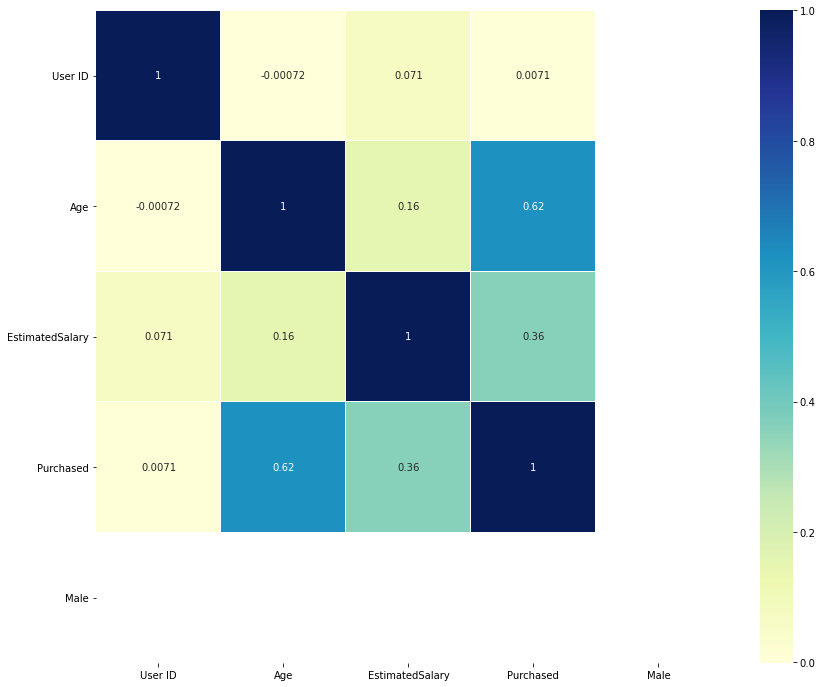

In [17]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

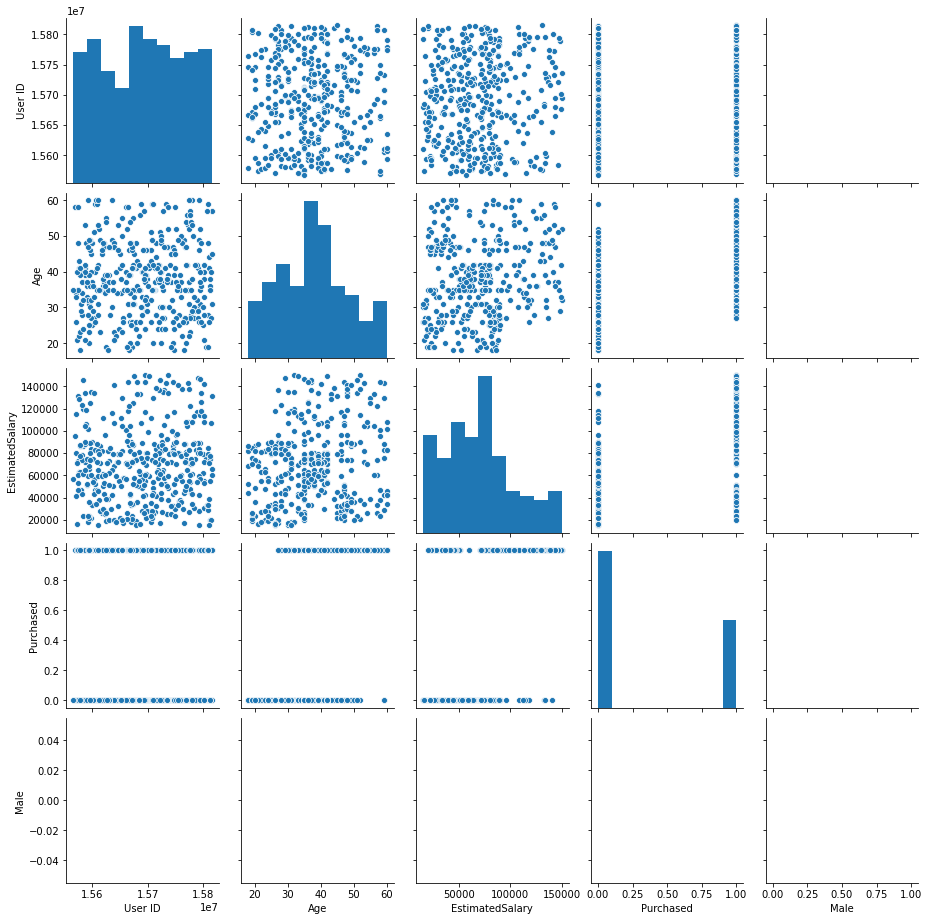

In [18]:
#pair plots
g = sns.pairplot(df)